# Fase di preparazione dei dati

## Descrizione del dataset

Abbiamo a disposizione due dataset:
- campioni positivi (dove c'è sicuramente un pedone)
- campioni negativi (dove invece il pedone non c'è)

Questi campioni sono organizzati in 3 insiemi disgiunti:
- Train Set
- Test Set
- Validation Set

Il nostro compito è quello di estrarre le immaggini di train, test e set per ogni campione positivo e negativo e creare per ogni immagine un "mapping" tale per cui assegniamo classe 1 o 0 se il pedone c'è o no.

In [2]:
# import delle librerie
import cv2
import numpy as np

### Campioni Positivi

Per quanto riguarda i campioni positivi, ogni immagine è "descritta" da delle boundary boxes che ci dicono dove si trovano i pedoni e a quale classe di pedone appartiene quella boundary box. A noi tuttavia interesserà sapere quelle appartenenti alla classe 1.

Per leggere le informazioni su queste boundary boxes prima devo leggere quali sono le "immagini" da tenere conto per ogni insieme (test, train e validation), ovvero devo prendere SOLO le boundary boxes delle annotations dei seguenti file txt:
- test_assignment.txt
- train_assignment.txt
- val_assignment.txt

In [3]:
def assign_sets():
    '''
    Questa funzione legge dalla cartella i seguenti file:
    - test_assignment.txt
    - train_assignment.txt
    - val_assignment.txt
    Poi ritorna tre array di valori
    '''
    test_set = []
    train_set = []
    val_set = []
    # leggo prima Train
    with open('train_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            train_set.append(row)
    # poi test
    with open('test_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            test_set.append(row)
    # infine validation
    with open('val_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            val_set.append(row)
    
    print(f'Train set: {len(train_set)}')
    print(f'Test set: {len(test_set)}')
    print(f'Val set: {len(val_set)}')
    return train_set, test_set, val_set

In [4]:
def extract_boundary_box(valore, annotations):
    '''
    Questa funzione prende un valore in input, ovvero l'immagine dove cercare
    ed estrae le boundary box della classe 1 relative a quel valore.
    '''
    path_file = 'Annotations/' + valore + '.jpg.txt'
    # print(path_file)
    rows = []
    if path_file[12:] in annotations:
        # il file è presente in Annotations
        with open(path_file, 'r') as f:
            for row in f:
                row = row.strip()
                rows.append(row)
        rows = rows[1:] # faccio slicings
        bboxes = []
        for row in rows:
            row = row.split(' ')
            target,x,y,w,h = row
            if int(target) == 1:
                box = [x,y,w,h]
                bboxes.append(box)
        # print(f'Ho trovato {len(bboxes)} boundary boxes')
        return bboxes
    return None

Estraggo tutti file contenuti dentro la cartella Annotations. Potrebbe esserci che ci siano dei valori contenuti in Annotations che non siano presenti nei file!

In [5]:
import os
directory = 'Annotations'
annotations = []
for root,dirs,files in os.walk(directory):
    for file in files:
        annotations.append(str(file))

In [6]:
print(f'Ci sono {len(annotations)} file in totale')

Ci sono 8918 file in totale


In [7]:
# creo i set
train, test, val = assign_sets()

bboxes_train = []
for i in range(len(train)):
    bboxes = extract_boundary_box(train[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        bboxes_train.append((train[i], bboxes))

bboxes_test = []
for i in range(len(test)):
    bboxes = extract_boundary_box(test[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        bboxes_test.append([test[i], bboxes])

bboxes_val = []
for i in range(len(val)):
    bboxes = extract_boundary_box(val[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        bboxes_val.append([val[i], bboxes])


print(f'Ci sono in totale {len(bboxes_train)} file di annotazioni per il train')
print(f'Ci sono in totale {len(bboxes_test)} file di annotazioni per il test')
print(f'Ci sono in totale {len(bboxes_val)} file di annotazioni per il validation')

Train set: 7000
Test set: 1000
Val set: 1000


Ci sono in totale 6919 file di annotazioni per il train
Ci sono in totale 983 file di annotazioni per il test
Ci sono in totale 991 file di annotazioni per il validation


In [8]:
directory_p = 'Images_Positive'

images_positive = []
for root,dirs,files in os.walk(directory_p):
    for file in files:
        images_positive.append(str(file))

print(f'Ci sono {len(annotations)} annotazioni per le boundary box')
print(f'Ci sono {len(images_positive)} immagini di campioni positivi')

Ci sono 8918 annotazioni per le boundary box
Ci sono 13259 immagini di campioni positivi


Ora che ho estratto tutte le Boundary Box di train, test e train ne stampo una di esempio per far capire come dobbiamo trattare:

In [9]:
bboxes_train[0]

('000040',
 [['45', '235', '79', '318'],
  ['60', '209', '120', '356'],
  ['119', '214', '168', '336'],
  ['94', '220', '136', '326'],
  ['213', '201', '287', '381'],
  ['268', '201', '339', '378'],
  ['312', '192', '389', '380'],
  ['374', '226', '391', '267'],
  ['417', '225', '438', '279'],
  ['428', '222', '446', '266'],
  ['443', '224', '456', '258'],
  ['449', '227', '467', '271'],
  ['396', '217', '406', '241'],
  ['402', '210', '413', '238'],
  ['409', '217', '419', '241'],
  ['531', '222', '550', '287'],
  ['527', '217', '538', '245'],
  ['511', '213', '522', '240'],
  ['515', '211', '525', '237'],
  ['491', '216', '502', '243'],
  ['484', '209', '494', '235'],
  ['473', '211', '483', '235'],
  ['477', '211', '487', '236'],
  ['468', '212', '476', '235'],
  ['461', '210', '471', '236'],
  ['456', '212', '466', '240'],
  ['448', '209', '459', '237'],
  ['439', '210', '450', '237'],
  ['431', '211', '442', '241'],
  ['420', '213', '432', '242']])

Ogni boundary box va letta come:[x,y,w,h], dove:
- x,y: coordinate del rettangolo in alto a sx dove inizia la boundary box
- w: larghezza
- h: altezza

L'idea è quella di usare il primo valore per 'aprire' l'immagine, poi usare le boundary box per fare slicing delle foto e poi applicare il descrittore HOG ad ognuno di loro. Alla fine, dopo aver aperto l'immagine e aver calcolato il descrittore su ogni campione positivo, otterrò un vettore di label positive del tipo (descrittore, 1)

Definisco innanzitutto il descrittore HOG, utilizzando i parametri di Default e la dimensione della finestra fissata a h=128, w=64 pixel. Dalla documentazione vediamo che questi sono i valori di default.
Inoltre, per il momento, addestriamo il nostro descrittore su un modello di Default di OpenCV

#### Descrittore HOG

cv2.HOGDescriptor(
  
                win_size=(64, 128),
                block_size=(16, 16),
                block_stride=(8, 8),
                cell_size=(8, 8),
                nbins=9,
                win_sigma=DEFAULT_WIN_SIGMA,
                threshold_L2hys=0.2,
                gamma_correction=true,
                nlevels=DEFAULT_NLEVELS
                
              )

- win_size: dimensione della finestra di rilevamento in pixel (larghezza, altezza). Definisce la regione di interesse. Deve essere un multiplo intero della dimensione della cella.

- block_size: dimensione del blocco in pixel (larghezza, altezza). Definisce quante celle sono presenti in ciascun blocco. Deve essere un multiplo intero della dimensione della cella e deve essere inferiore alla finestra di rilevamento. Più piccolo è il blocco, maggiori saranno i dettagli che otterrai.

- block_stride: blocca il passo in pixel (orizzontale, verticale). Deve essere un multiplo intero della dimensione della cella. Il block_stride definisce la distanza tra i blocchi adiacenti, ad esempio, 8 pixel in orizzontale e 8 pixel in verticale. Block_strides più lunghi rendono l'algoritmo più veloce (perché vengono valutati meno blocchi) ma l'algoritmo potrebbe non funzionare altrettanto bene.

- cell_size: dimensione della cella in pixel (larghezza, altezza). Determina la dimensione della tua cella. Più piccola è la cella, più dettagli otterrai.

- nbins: numero di bin per gli istogrammi. Determina il numero di contenitori angolari utilizzati per creare gli istogrammi. Con più contenitori catturi più direzioni del gradiente. HOG utilizza gradienti senza segno, quindi i contenitori angolari avranno valori compresi tra 0 e 180 gradi.

- win_sigma: parametro della finestra di livellamento gaussiano. Le prestazioni dell'algoritmo HOG possono essere migliorate smussando i pixel vicino ai bordi dei blocchi applicando una finestra spaziale gaussiana a ciascun pixel prima di calcolare gli istogrammi.

- soglia_L2hys: ritiro del metodo di normalizzazione L2-Hys (norma L2 ritagliata in stile Lowe). Il metodo L2-Hys viene utilizzato per normalizzare i blocchi e consiste in una norma L2 seguita da ritaglio e rinormalizzazione. Il ritaglio limita il valore massimo del vettore descrittore per ciascun blocco in modo che abbia il valore della soglia specificata (0,2 per impostazione predefinita).

- gamma_correction: flag per specificare se è richiesta o meno la preelaborazione della correzione gamma. L'esecuzione della correzione gamma aumenta leggermente le prestazioni dell'algoritmo HOG.

- nlevels: aumenta il numero massimo di finestre di rilevamento.

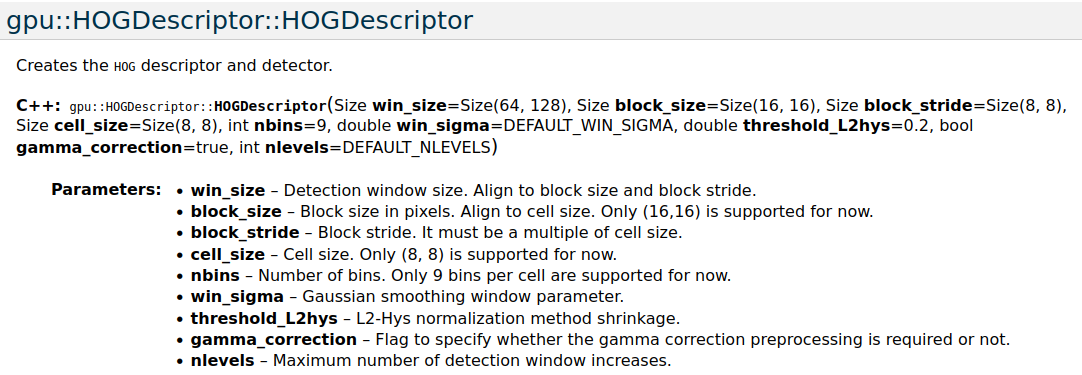

In [10]:
# Specify the parameters for our HOG descriptor
win_size = (64, 128)
cell_size = (8, 8)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 9

# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

Definisco una funzione che, presa un elemento da un set (train, test o val):
- estrare le boundary boxes
- per ognuna di essere ritorna un descrittore

La funzione dovrà tornare quindi una lista di descrittori che useremo per costruire l'esempio di campioni positivi

In [11]:
images_positive[0]

'005566.jpg'

In [12]:
def extract_subset_bbox(valore):
    '''
    Presa in input l'immagine da 'analizzare', estraggo le boundary boxes e faccio slicing
    '''
    image_path, bboxes = valore
    if (f'{image_path}.jpg' in images_positive):
        image = cv2.imread(f'Images_Positive/{image_path}.jpg')
        sub_images = []
        for bbox in bboxes:
            # faccio il casting degli interi
            for i in range(len(bbox)):
                bbox[i] = int(bbox[i])
            x,y,w,h = bbox
            if w > 0 and h > 0:
                # evito boundary box false
                sub_image = image[y:y+h, x:x+w].copy()
                # cv2.imshow(f'Boundary Box: {bbox}', sub_image)
                # cv2.waitKey(0)
                sub_images.append(sub_image)
        # cv2.destroyAllWindows()
        return sub_images
    return []

In [13]:
bboxes_0_example = extract_subset_bbox(bboxes_train[0])

In [14]:
len(extract_subset_bbox(bboxes_train[0])) == len(bboxes_train[0][1])
# la dimensione corrisponde

True

Realizzo anche una funzione di image proccessing per fare in modo che ogni immagine croppata dalla funzione precedente venga riscalata a 64x128 pixel e:
- prima viene convertita in scala di grigi
- eventualmente faccio equilizzazione dei colori per portarli tutti a livelli di contrasto e luminanza identici
- poi applico un filtro gaussiano
- infine faccio resize dell'immagine

In [15]:
def subimage_processing(img):
    # faccio conversione in scala di grigi
    # cv2.imshow('Immagine originale', img)
    # cv2.waitKey(0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # poi applico una equilizzazione
    img = cv2.equalizeHist(img)
    # cv2.imshow('Immagine equilizzata', img)
    # cv2.waitKey(0)
    # quindi applico un filtro gaussiano er ridurre eventuale rumore
    img = cv2.GaussianBlur(img,(5,5),0) # kernel size = 5x5, sigma_x = 0
    # cv2.imshow('Immagine con filtro', img)
    # cv2.waitKey(0)
    # infine faccio reshape
    img = cv2.resize(img, (64, 128))  # Larghezza x Altezza
    # cv2.imshow('Immagine con reshape', img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return img

In [16]:
subimage_processing(bboxes_0_example[0])

array([[  9,   7,   6, ...,  55,  65,  68],
       [  9,   8,   8, ...,  56,  63,  64],
       [ 10,  11,  10, ...,  55,  57,  57],
       ...,
       [ 48,  48,  49, ..., 182, 184, 184],
       [ 46,  47,  47, ..., 176, 177, 178],
       [ 45,  45,  46, ..., 172, 174, 176]], dtype=uint8)

Resta solo da testare il comportamento con i descrittori

In [17]:
subimages = extract_subset_bbox(bboxes_train[0])
descriptors = []
for subimage in subimages:
    subimage = subimage_processing(subimage)
    descriptor = hog.compute(subimage)
    descriptors.append(descriptor)

In [18]:
descriptors[0].shape

(3780,)

In [19]:
descriptors[1].shape

(3780,)

In [20]:
descriptors[27].shape

(3780,)

Notiamo come tutti i descrittori hanno lo stesso numero di feature a parità di dimensione!

adesso che sappiamo che funziona per un campione, partiamo con la costruzione dei campioni positivi

In [21]:
positive_samples = []

Vista l'alta dimensionalità del dataset decidiamo di prendere un sottoesempio del campione. Per esempio decidiamo di prendere in totale qualcosa come 2000 campioni dal dataset.
Rispetto le proporzioni del 78% train, 11% test e 11% validazione. Su 2000 campioni avremo:
- 1560 campioni di train
- 220 campioni di test
- 220 campioni di validazione

In [24]:
# randomizziamo
import random

random.shuffle(bboxes_train)
random.shuffle(bboxes_test)
random.shuffle(bboxes_val)

reduced_train = bboxes_train[:780]
reduced_test = bboxes_test[:110]
reduced_val = bboxes_val[:110]

#### Estraggo i campioni di train

In [25]:
sub_sets = []
for i in range(len(reduced_train)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_train[i])
    sub_sets.append(subimages)

Index0
Index100
Index200
Index300
Index400
Index500
Index600
Index700


In [26]:
train_samples = []

In [27]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                train_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400
Index 500
Index 600
Index 700


In [29]:
print(f'Ci sono {len(train_samples)} campioni per il train')
print(f'Ci sono {len(train_samples[0][0])} descrittori per ogni immagine')

Ci sono 15190 campioni per il train
Ci sono 3780 descrittori per ogni immagine


#### Estraggo i campioni di Test

In [30]:
sub_sets = []
for i in range(len(reduced_test)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_test[i])
    sub_sets.append(subimages)

Index0
Index100


In [37]:
test_samples = []

In [38]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                test_samples.append(new_sample)

Index 0
Index 100


In [39]:
print(f'Ci sono {len(test_samples)} campioni per il test')
print(f'Ci sono {len(test_samples[0][0])} descrittori per ogni immagine')

Ci sono 2308 campioni per il test
Ci sono 3780 descrittori per ogni immagine


#### Estraggo i campioni di validazione

In [40]:
sub_sets = []
for i in range(len(reduced_val)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_val[i])
    sub_sets.append(subimages)

Index0
Index100


In [41]:
val_samples = []

In [42]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                val_samples.append(new_sample)

Index 0
Index 100


In [44]:
print(f'Ci sono {len(val_samples)} campioni per la validazione')
print(f'Ci sono {len(val_samples[0][0])} descrittori per ogni immagine')

Ci sono 2308 campioni per la validazione
Ci sono 3780 descrittori per ogni immagine


### Campioni negativi

Per estrarre i campioni negativi, devo usare la cartella Images_negative

In [45]:
directory_n = 'Images_negative'

images_negative = []

In [52]:
train_n = directory_n + '/train_neg'
test_n = directory_n + '/test_neg'
val_n = directory_n + '/val_neg'

In [53]:
neg_train_img = []
neg_test_img = []
neg_val_img = []

In [55]:
for root,dirs,files in os.walk(train_n):
    for file in files:
        images_negative.append(str(file))
        neg_train_img.append(str(file))

In [56]:
for root,dirs,files in os.walk(test_n):
    for file in files:
        images_negative.append(str(file))
        neg_test_img.append(str(file))

In [57]:
for root,dirs,files in os.walk(val_n):
    for file in files:
        images_negative.append(str(file))
        neg_val_img.append(str(file))

In [59]:
print(f'Ci sono {len(images_negative)} immagini di campioni negativi')
print(f'Ci sono {len(neg_train_img)} immagini di train campioni negativi')
print(f'Ci sono {len(neg_test_img)} immagini di test campioni negativi')
print(f'Ci sono {len(neg_val_img)} immagini di validazione campioni negativi')

Ci sono 1672 immagini di campioni negativi
Ci sono 1015 immagini di train campioni negativi
Ci sono 453 immagini di test campioni negativi
Ci sono 203 immagini di validazione campioni negativi


Per ognuna di queste immagini devo estrarre delle boundary box a cui applicare i descrittori, in maniera casuale

Quindi in prima istanza posso pensare di vedere cosa accade se applico HOG ad una immagine

In [61]:
path = 'Images_negative/train_neg/'

In [60]:
neg_train_img[0]

'no_person__no_bike_184.png'

In [71]:
hog_n = cv2.HOGDescriptor()
hog_n.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [72]:
neg_example_img = cv2.imread(path + neg_train_img[0])
cv2.imshow('Immagine esempio', neg_example_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
neg_example_img.shape

(480, 640, 3)

In [73]:
locations, confidence = hog.detectMultiScale(neg_example_img, padding=(4,4), scale=1.2)

In [74]:
len(locations)

0

In [94]:
import random

h,w,_ = neg_example_img.shape
portion_size = (150, 250) # da intedersi come (x,y)

tries = 10

sub_images = []
for i in range(tries):
    x = random.randint(0, w-1)
    y = random.randint(0, h-1)
    sub_neg_img = neg_example_img[y:y+portion_size[1], x:x+portion_size[0]].copy()
    sub_images.append(sub_neg_img)

In [95]:
for sub_image in sub_images:
    cv2.imshow('Immagine esempio', sub_image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

Ora che sappiamo che comunque riesco a prendere delle finestre casuali, posso procedere a randomizzare il tutto per campioni negativi di train, test e validation. Per semplicità ricopio la funzione per applicare il resize

In [96]:
def subimage_processing(img):
    # faccio conversione in scala di grigi
    # cv2.imshow('Immagine originale', img)
    # cv2.waitKey(0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # poi applico una equilizzazione
    img = cv2.equalizeHist(img)
    # cv2.imshow('Immagine equilizzata', img)
    # cv2.waitKey(0)
    # quindi applico un filtro gaussiano er ridurre eventuale rumore
    img = cv2.GaussianBlur(img,(5,5),0) # kernel size = 5x5, sigma_x = 0
    # cv2.imshow('Immagine con filtro', img)
    # cv2.waitKey(0)
    # infine faccio reshape
    img = cv2.resize(img, (64, 128))  # Larghezza x Altezza
    # cv2.imshow('Immagine con reshape', img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return img

In [105]:
for sub_image in sub_images:
    cv2.imshow('Immagine esempio', sub_image)
    img_proc = subimage_processing(sub_image)
    cv2.imshow('Immagine pronta per applicare il descrittore', img_proc)
    descriptor = hog.compute(img_proc)
    print(len(descriptor))
    cv2.waitKey(0)
cv2.destroyAllWindows()

3780
3780
3780
3780
3780
3780
3780
3780
3780
3780


In [125]:
negative_samples = []

#### Train Negativi

In [126]:
neg_train_samples = []

In [127]:
path_train = train_n + '/'
path_train

'Images_negative/train_neg/'

In [128]:
path_train + neg_train_img[0] # prende una immagine

'Images_negative/train_neg/no_person__no_bike_184.png'

In [129]:
import random
portion_size = (150, 250) # da intedersi come (x,y)

In [130]:
for i in range(len(neg_train_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_train + neg_train_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(1,5) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        x = random.randint(0, w-1)
        y = random.randint(0, h-1)
        sub_neg_img = image[y:y+portion_size[1], x:x+portion_size[0]].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_train_samples.append(new_sample)

Index 0
Index 100


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 200


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 300


libpng warning: iCCP: known incorrect sRGB profile


Index 400


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 500


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 600


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 700


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 800


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 900


libpng warning: iCCP: known incorrect sRGB profile


Index 1000


In [131]:
print(f'Ci sono {len(neg_train_samples)} esempi di addestramento')

Ci sono 2954 esempi di addestramento


In [137]:
neg_train_samples[0][1]

0

In [135]:
len(neg_train_samples[0][0])

3780

In [138]:
train_samples += neg_train_samples

In [139]:
print(f'In totale ci sono {len(train_samples)} campioni di addestramento')

In totale ci sono 18144 campioni di addestramento


#### Test Negativi

In [140]:
neg_test_samples = []

In [141]:
path_test = test_n + '/'
path_test

'Images_negative/test_neg/'

In [142]:
for i in range(len(neg_test_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_test + neg_test_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(1,5) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        x = random.randint(0, w-1)
        y = random.randint(0, h-1)
        sub_neg_img = image[y:y+portion_size[1], x:x+portion_size[0]].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_test_samples.append(new_sample)

Index 0


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 100


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 200


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 300


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 400


In [143]:
print(f'Ci sono {len(neg_test_samples)} esempi di test')

Ci sono 1370 esempi di test


In [144]:
test_samples += neg_test_samples

In [145]:
print(f'Ci sono {len(test_samples)} esempi di test in totale')

Ci sono 3678 esempi di test in totale


#### Val Negativi

In [149]:
neg_val_samples = []

In [150]:
path_val = val_n + '/'
path_val

'Images_negative/val_neg/'

In [151]:
for i in range(len(neg_val_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_val + neg_val_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(1,5) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        x = random.randint(0, w-1)
        y = random.randint(0, h-1)
        sub_neg_img = image[y:y+portion_size[1], x:x+portion_size[0]].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_val_samples.append(new_sample)

Index 0


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 100


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 200


In [152]:
print(f'Ci sono {len(neg_val_samples)} campioni di validazione negativi')

Ci sono 620 campioni di validazione negativi


In [153]:
val_samples += neg_val_samples

In [154]:
print(f'CI sono {len(val_samples)} campioni di validazione in totale')

CI sono 2928 campioni di validazione in totale


### Risultato finale

Adesso, se volessimo utilizzare i campioni per addestrare un modello dobbiamo vedere gli array:
- train_samples
- test_samples
- val_samples

In [146]:
len(train_samples)

18144

In [147]:
len(test_samples)

3678

In [155]:
len(val_samples)

2928

In [156]:
len(positive_samples)

21815

In [157]:
len(negative_samples)

4944

In [158]:
def count_class_set(set_):
    class_0 = 0
    class_1 = 0
    for item in set_:
        if item[1] == 0:
            class_0 += 1
        else:
            class_1 += 1
    return (class_0, class_1)

In [159]:
suddivisione_train = count_class_set(train_samples)

In [160]:
print(f'Suddivisione: {suddivisione_train[0]} elementi di classe 0, {suddivisione_train[1]} elementi di classe 1')

Suddivisione: 2954 elementi di classe 0, 15190 elementi di classe 1


In [161]:
suddivisione_test = count_class_set(test_samples)
print(f'Suddivisione: {suddivisione_test[0]} elementi di classe 0, {suddivisione_test[1]} elementi di classe 1')

Suddivisione: 1370 elementi di classe 0, 2308 elementi di classe 1


In [162]:
suddivisione_val = count_class_set(val_samples)
print(f'Suddivisione: {suddivisione_val[0]} elementi di classe 0, {suddivisione_val[1]} elementi di classe 1')

Suddivisione: 620 elementi di classe 0, 2308 elementi di classe 1


In [170]:
len(train_samples[-1500][0])

3780